# report

### data overview:
* The dataset have 146 data point ,21 features.
* these features have much missing value:'deferral_payments','restricted_stock_deferred','loan_advances','director_fees','deferred_income'
* Pois tend to have higher 'salary','total_payments','exercised_stock_options'
* there are 127 non-pois and 18 pois
 
Number of data is relatively small so I use StratifiedShuffleSplit with Grid Search CV in my train_optimal_classifier function 


### Outliers 
'LAY KENNETH L', 'TOTAL',  meet abs(s['total_payments']-df['total_payments'].mean()) > (3*df['total_payments'].std()

but lay seems to be a important POI

total is not a person


so 'TOTAL' should be delated


### Feature Engineering 

1. all features other than emaildress was chosed, because I will use SelectKBest later
2. 2 new features 'from_poi_ratio','to_poi_ratio' are created, as they show whom communicated with POI’s at higher rate.
3. PCA and slectKBest were used to combine features 

with out PCA selectKbest best performance of LogisticRegression 

Precision: 0.38667	Recall: 0.59450

after combined features ,they can  Precision: 0.38639	Recall: 0.59600	

* slectKBest scores


[('from_poi_ratio', nan),
 ('exercised_stock_options', 25.380105299760199),
 ('total_stock_value', 24.752523020258508),
 ('bonus', 21.327890413979102),
 ('salary', 18.861795316466416),
 ('deferred_income', 11.732698076065354),
 ('long_term_incentive', 10.222904205832778),
 ('restricted_stock', 9.4807432034789336),
 ('total_payments', 8.9678193476776205),
 ('shared_receipt_with_poi', 8.9038215571655712),
 ('loan_advances', 7.3014066515360359),
 ('expenses', 6.3746144901977475),
 ('from_poi_to_this_person', 5.4466874833253529),
 ('other', 4.2635766381444693),
 ('from_this_person_to_poi', 2.470521222656084),
 ('director_fees', 2.0893098994318806),
 ('to_messages', 1.7516942790340737),
 ('deferral_payments', 0.20970584227026345),
 ('from_messages', 0.1587702392129193),
 ('to_poi_ratio', 0.14088669950738916),
 ('restricted_stock_deferred', 0.064477028038728595)]


### perfornamce of  algorithm
#### why need toning param?
* perfornamce are differ from different context , so we need adapt our metrics to the context
* system defult params usually can not reach our purpose

#### before toning:
* SVM : no True positove 
* desicionTree ; Precision: 0.21145	Recall: 0.20500	
* RandomForestClassifier: Precision: 0.36876	Recall: 0.11450	
* LogisticRegression : Precision: 0.17733	Recall: 0.17050	
#### after toning:
* SVM : Precision: 0.33871	Recall: 0.11550	
* desicionTree ;  Precision: 0.23573	Recall: 0.22300	
* RandomForestClassifier: Precision: 0.35389	Recall: 0.26400	
* LogisticRegression : Precision: 0.38639	Recall: 0.59600

### Validate and Evaluate
#### Evaluation Metrics
* precision score ,recall score, F1 score ,  were used in this project
* precision score implict what fraction of POIs picked by our algorithm is actually POIs.
* recall score represent what fraction of all POIs was picked by our algorithm 
*  F1 = 2 * (precision * recall) / (precision + recall),it is the weighted average of precision and recall 
* Because the aim of this project is Precision and Recall both > 0.3 ,I choose F1 for tuning  algorithms
#### Validation Strategy
1. what validation is and why it is important?
sometimes, our alforithms learn too 'well',It take characteristic of traning sample as characteristic that all other potential sample will have,  it has just seen would have a perfect score but would fail to predict anything .This situation is called overfitting.

To avoid overfitting, we need a testing set to test generalization ability , the testing set should be exclusive with training set 
2. I use StratifiedShuffleSplit(y, 5) in parameters tuning stage , so that parameters give our algorithm best peformance can be picked up


# Data Exploration and Outlier Investigation

Data points:
146
number of features
21


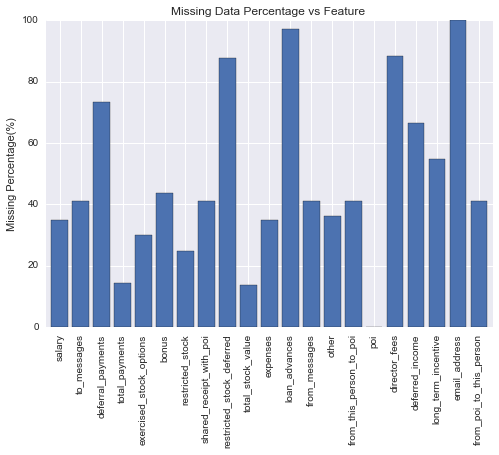

Outliers:   ['LAY KENNETH L', 'TOTAL']


,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,49110078.0,...,81525000.0,36.0,10359729.0,16.0,True,NaN,-300000.0,3600000.0,NaN,123.0
TOTAL,26704229.0,NaN,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,NaN,-7576788.0,434509511.0,...,83925000.0,NaN,42667589.0,NaN,False,1398517.0,-27992891.0,48521928.0,NaN,NaN


In [1]:
import sys
import pickle
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sys.path.append("../tools/")
# load data from pkl
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
# data points
print "Data points:"
print(len(data_dict))
# number of features
print "number of features"
print(len(data_dict['ALLEN PHILLIP K']))
# get data into dataframe
df = pandas.DataFrame.from_dict(data_dict, orient='index')
# ref : http://stackoverflow.com/questions/18434208/pandas-converting-to-numeric-creating-nans-when-necessary
df = df.apply(pandas.to_numeric, args=('coerce',))
df[['poi']] = df[['poi']].astype(bool)
# take a look at missing data
non = 100*df.isnull().sum()/146.0
plt.figure()
non.plot(kind='bar',width=.8)
plt.title('Missing Data Percentage vs Feature ')
plt.ylabel('Missing Percentage(%)')
plt.show()

# detect outlier
Outliers = []
for i, s in df.iterrows():
    if abs(s['total_payments']-df['total_payments'].mean()) > (3*df['total_payments'].std()):
        Outliers.append(i)
print 'Outliers:  ',Outliers
df.loc[Outliers]

* we get 2 data point with very high total_payments ,as LAY KENNETH L is an important POI, just 'TOTAL' should be removed

In [2]:
import numpy as np
# drop outliers
df.drop('TOTAL',inplace=True)

## show nthe number of non-NaN values in each column
non_Nan = df.groupby('poi').count()
non_Nan

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
poi,,,,,,,,,,,,,,,,,,,,
False,77,72,33,106,89,65,92,72,17,107,76,2,72,74,72,16,37,53,0,72
True,17,14,5,18,12,16,17,14,0,18,18,1,14,18,14,0,11,12,0,14


In [3]:
print 'POI counts: \n',len(df[df['poi']==True])
print 'non-POI counts: \n',len(df[df['poi']==False])

POI counts: 
18
non-POI counts: 
127


* there many features which Poi missing much data 



## primary Feature Selection, creat new feature, del outlier, format data

*  I removed the email address feature because it was not useful
*  I remove loan_advances ,director_fees ,restricted_stock_deferred for missing to much data 
*  I create 2 new features from_poi_ratio , and to_poi_ratio ,because there connectiong between POIs

In [4]:
from feature_format import featureFormat, targetFeatureSplit
from tester import *

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi']  # You will need to use more features

features_list += ['bonus', 'exercised_stock_options', 'total_stock_value']
features_list += ['salary', 'deferral_payments', 'total_payments',
                  'loan_advances', 'restricted_stock_deferred',
                  'deferred_income', 'expenses', 'other', 'long_term_incentive',
                  'restricted_stock', 'director_fees']
features_list += ['to_messages', 'from_poi_to_this_person', 'from_messages',
                  'from_this_person_to_poi', 'shared_receipt_with_poi']


### Load the dictionary containing the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "r"))

### Task 2: Remove outliers
del data_dict['TOTAL']

### Task 3: Create new feature(s)
for name in data_dict:

    try:
        data_dict[name]['from_poi_ratio'] = data_dict[name][
            'from_poi_to_this_person'
        ] / data_dict[name]['to_messages']
    except:
        data_dict[name]['from_poi_ratio'] = 'NaN'
    try:
        data_dict[name]['to_poi_ratio'] = data_dict[name][
            'from_this_person_to_poi'
        ] / data_dict[name]['from_messages']
    except:
        data_dict[name]['to_poi_ratio'] = 'NaN'

features_list += ['from_poi_ratio', 'to_poi_ratio']

### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys=True)
labels, features = targetFeatureSplit(data)


In [5]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.grid_search import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn import cross_validation
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


## find best clf funtion

# ref:http://stackoverflow.com/questions/38987/how-can-i-merge-two-python-dictionaries-in-a-single-expression
def merge_two_dicts(x, y):
    '''Given two dicts, merge them into a new dict as a shallow copy.'''
    z = x.copy()
    z.update(y)
 
    return z

param_feature = dict(features__pca__n_components=list(range(22)),
                        features__univ_select__k=list(range(22)))
# ref : https://github.com/pcasaretto/machinelearning-finalproject/blob/master/exploration.py
def train_optimal_classifier(clf, X, y, param, scale=False):
    pipeline = 0

    combined_features = FeatureUnion([("pca", PCA()), ("univ_select", SelectKBest())])

    if scale:
        pipeline = Pipeline([("minmax", MinMaxScaler()),
                             ("features", combined_features), ("clf", clf)])
    else:
        pipeline = Pipeline([("features", combined_features), ("clf", clf)])
    
    ## merge 2 param_grid
    
    param_grid = merge_two_dicts(param,param_feature)

    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=cross_validation.StratifiedShuffleSplit(y, 5),
        verbose=1,
        scoring='f1',
        error_score=0,
        refit=True,
        )
    grid_search.fit(X, y)
    print "Best parameters"
    print grid_search.best_params_
    return (grid_search.best_estimator_)



## SVM 

In [6]:
svm = SVC()

param_grid = { 'clf__C': [0.1, 1, 10, 100, 1000],
               'clf__kernel': ['rbf', 'linear']}
clf = train_optimal_classifier(svm, features,labels,param_grid, scale=True)
test_classifier(clf, my_dataset, features_list ,folds = 1000)
    

Fitting 5 folds for each of 4840 candidates, totalling 24200 fits


C:\Users\huaka\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [19] are constant.
  UserWarning)
C:\Users\huaka\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
C:\Users\huaka\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:1542: FitFailedWarning: Classifier fit failed. The score on this train-test partition for these parameters will be set to 0.000000. Details: 
ValueError('Found array with 0 feature(s) (shape=(130, 0)) while a minimum of 1 is required.',)
  "Details: \n%r" % (error_score, e), FitFailedWarning)
C:\Users\huaka\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [19 20] are constant.
  UserWarning)
C:\Users\huaka\AppData\Local\

Best parameters
{'features__pca__n_components': 19, 'features__univ_select__k': 17, 'clf__C': 1000, 'clf__kernel': 'rbf'}
Pipeline(steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))), ('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, n_components=19, whiten=False)), ('univ_select', SelectKBest(k=17, score_func=<function f_classif at 0x000000000C2C8D68>))],
       transformer_weight...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
	Accuracy: 0.86500	Precision: 0.48327	Recall: 0.18050	F1: 0.26283	F2: 0.20636
	Total predictions: 15000	True positives:  361	False positives:  386	False negatives: 1639	True negatives: 12614



## DecisionTree

In [7]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(random_state=0)

param_grid = {'clf__criterion':['gini','entropy'],
              'clf__min_samples_split':[2,3,4,5],
              'clf__max_leaf_nodes':[None, 2, 3, 4, 5, 6, 7, 8, 9, 10],
}
clf = train_optimal_classifier(tree, features,labels,param_grid, scale=True)
test_classifier(clf, my_dataset, features_list ,folds = 1000)

Fitting 5 folds for each of 38720 candidates, totalling 193600 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    4.2s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:   11.9s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   17.3s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:   24.1s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   31.1s
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   39.6s
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:   49.3s
[Parallel(n_jobs=1)]: Done 6049 tasks       | elapsed:   59.9s
[Parallel(n_jobs=1)]: Done 7199 tasks       | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 8449 tasks       | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done 9799 tasks       | elapsed:  1.6min
[Parallel(n_jobs=1)]: Done 11249 tasks       | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done 12799 tasks       | elapsed:  2

Best parameters
{'features__pca__n_components': 16, 'clf__criterion': 'entropy', 'features__univ_select__k': 6, 'clf__min_samples_split': 4, 'clf__max_leaf_nodes': 6}
Pipeline(steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))), ('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, n_components=16, whiten=False)), ('univ_select', SelectKBest(k=6, score_func=<function f_classif at 0x000000000C2C8D68>))],
       transformer_weights...split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'))])
	Accuracy: 0.83847	Precision: 0.34729	Recall: 0.24050	F1: 0.28419	F2: 0.25626
	Total predictions: 15000	True positives:  481	False positives:  904	False negatives: 1519	True negatives: 12096



##  RandomForestClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
param_grid = {"clf__n_estimators":[2,3,4,5],
              "clf__criterion": ["gini", "entropy"]}
clf = train_optimal_classifier(RFC, features,labels,param_grid, scale=True)
test_classifier(clf, my_dataset, features_list ,folds = 1000)

Fitting 5 folds for each of 3872 candidates, totalling 19360 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    5.9s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:   10.5s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:   16.3s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   23.6s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:   32.0s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   43.3s
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   56.1s
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 6049 tasks       | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done 7199 tasks       | elapsed:  1.8min
[Parallel(n_jobs=1)]: Done 8449 tasks       | elapsed:  2.2min
[Parallel(n_jobs=1)]: Done 9799 tasks       | elapsed:  2.6min
[Parallel(n_jobs=1)]: Done 11249 tasks       | elapsed:  2.9min
[Parallel(n_jobs=1)]: Done 12799 tasks       | elapsed:  3

Best parameters
{'features__pca__n_components': 20, 'clf__criterion': 'entropy', 'clf__n_estimators': 5, 'features__univ_select__k': 21}
Pipeline(steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))), ('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, n_components=20, whiten=False)), ('univ_select', SelectKBest(k=21, score_func=<function f_classif at 0x000000000C2C8D68>))],
       transformer_weight...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])
	Accuracy: 0.84760	Precision: 0.36089	Recall: 0.18550	F1: 0.24505	F2: 0.20547
	Total predictions: 15000	True positives:  371	False positives:  657	False negatives: 1629	True negatives: 12343



## LogisticRegression

In [10]:
lg = LogisticRegression()
param_grid = {  "clf__C":[ 1, 10, 10**2,10**5,10**10, 10**20],
                "clf__tol":[10**-1, 10**-5, 10**-10, 10**-20],
                "clf__class_weight":['balanced']
                }
clf = train_optimal_classifier(lg, features,labels,param_grid, scale=True)
test_classifier(clf, my_dataset, features_list ,folds = 1000)

Fitting 5 folds for each of 11616 candidates, totalling 58080 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    4.4s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    8.1s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:   12.5s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:   18.1s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:   24.7s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   32.2s
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   41.0s
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:   51.0s
[Parallel(n_jobs=1)]: Done 6049 tasks       | elapsed:  1.0min
[Parallel(n_jobs=1)]: Done 7199 tasks       | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 8449 tasks       | elapsed:  1.4min
[Parallel(n_jobs=1)]: Done 9799 tasks       | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done 11249 tasks       | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done 12799 tasks       | elapsed:  2

Best parameters
{'clf__tol': 1e-10, 'features__univ_select__k': 3, 'clf__C': 100000000000000000000L, 'clf__class_weight': 'balanced', 'features__pca__n_components': 18}
Pipeline(steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))), ('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, n_components=18, whiten=False)), ('univ_select', SelectKBest(k=3, score_func=<function f_classif at 0x000000000C2C8D68>))],
       transformer_weights...          random_state=None, solver='liblinear', tol=1e-10, verbose=0,
          warm_start=False))])
	Accuracy: 0.81993	Precision: 0.38639	Recall: 0.59600	F1: 0.46883	F2: 0.53766
	Total predictions: 15000	True positives: 1192	False positives: 1893	False negatives:  808	True negatives: 11107



### justify feature engineering



In [11]:
## cutted function
def t(clf, X, y, param, scale=False):
    pipeline = 0

    combined_features = FeatureUnion([("pca", PCA()), ("univ_select", SelectKBest())])

    if scale:
        pipeline = Pipeline([("minmax", MinMaxScaler()), ("clf", clf)])
    else:
        pipeline = Pipeline([("clf", clf)])
    grid_search = GridSearchCV(
        pipeline,
        param_grid=param,
        cv=cross_validation.StratifiedShuffleSplit(y, 5),
        verbose=1,
        scoring='f1',
        error_score=0,
        refit=True,
        )
    grid_search.fit(X, y)
    print "Best parameters"
    print grid_search.best_params_
    return (grid_search.best_estimator_)


In [23]:
param_grid = {  "clf__C":[ 1, 10, 10**2,10**5,10**10, 10**20],
                "clf__tol":[10**-1, 10**-5, 10**-10, 10**-20],
                "clf__class_weight":['balanced']
                }
clf = t(lg, features,labels,param_grid, scale=True)
test_classifier(clf, my_dataset, features_list ,folds = 1000)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.8s finished


Best parameters
{'clf__tol': 1e-05, 'clf__C': 100000000000000000000L, 'clf__class_weight': 'balanced'}
Pipeline(steps=[('minmax', MinMaxScaler(copy=True, feature_range=(0, 1))), ('clf', LogisticRegression(C=100000000000000000000L, class_weight='balanced',
          dual=False, fit_intercept=True, intercept_scaling=1,
          max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
          random_state=None, solver='liblinear', tol=1e-05, verbose=0,
          warm_start=False))])
	Accuracy: 0.82020	Precision: 0.38667	Recall: 0.59450	F1: 0.46857	F2: 0.53679
	Total predictions: 15000	True positives: 1189	False positives: 1886	False negatives:  811	True negatives: 11114



### scores from SelectKBest

In [13]:

k_best = SelectKBest()
k_best.fit(features, labels)
scores = k_best.scores_
unsorted_pairs = zip(features_list[1:], scores)
sorted_pairs = list(reversed(sorted(unsorted_pairs, key=lambda x: x[1])))

sorted_pairs

[('from_poi_ratio', nan),
 ('exercised_stock_options', 25.380105299760199),
 ('total_stock_value', 24.752523020258508),
 ('bonus', 21.327890413979102),
 ('salary', 18.861795316466416),
 ('deferred_income', 11.732698076065354),
 ('long_term_incentive', 10.222904205832778),
 ('restricted_stock', 9.4807432034789336),
 ('total_payments', 8.9678193476776205),
 ('shared_receipt_with_poi', 8.9038215571655712),
 ('loan_advances', 7.3014066515360359),
 ('expenses', 6.3746144901977475),
 ('from_poi_to_this_person', 5.4466874833253529),
 ('other', 4.2635766381444693),
 ('from_this_person_to_poi', 2.470521222656084),
 ('director_fees', 2.0893098994318806),
 ('to_messages', 1.7516942790340737),
 ('deferral_payments', 0.20970584227026345),
 ('from_messages', 0.1587702392129193),
 ('to_poi_ratio', 0.14088669950738916),
 ('restricted_stock_deferred', 0.064477028038728595)]

## if with out tuning

In [14]:
test_classifier(svm, my_dataset, features_list ,folds = 1000)

Got a divide by zero when trying out: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Precision or recall may be undefined due to a lack of true positive predicitons.


In [15]:
test_classifier(tree, my_dataset, features_list ,folds = 1000)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
	Accuracy: 0.79207	Precision: 0.21145	Recall: 0.20500	F1: 0.20817	F2: 0.20626
	Total predictions: 15000	True positives:  410	False positives: 1529	False negatives: 1590	True negatives: 11471



In [16]:
test_classifier(RFC, my_dataset, features_list ,folds = 1000)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
	Accuracy: 0.85587	Precision: 0.37264	Recall: 0.11850	F1: 0.17982	F2: 0.13722
	Total predictions: 15000	True positives:  237	False positives:  399	False negatives: 1763	True negatives: 12601



In [18]:
test_classifier(lg, my_dataset, features_list ,folds = 1000)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
	Accuracy: 0.78393	Precision: 0.17733	Recall: 0.17050	F1: 0.17385	F2: 0.17182
	Total predictions: 15000	True positives:  341	False positives: 1582	False negatives: 1659	True negatives: 11418

